In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

Q1. Import the Dataset

In [2]:
olympics = pd.read_csv('olympics.csv')
print(olympics.shape)

(271116, 17)


Q2. Describe the Age column of the dataset on various parameters using describe API.

In [3]:
age = olympics.Age
print(age.describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


Q3. Print the list of columns that have numeric datatypes.

In [4]:
df_numerics_only = olympics.select_dtypes(include=np.number)
col = df_numerics_only.columns.values.tolist()
print(col)

['ID', 'Age', 'Height', 'Weight', 'Year']


Q4. Print the columns that contain null values along with the count of null values present in each column.

In [5]:
keys=olympics.isna().sum().keys()
values=olympics.isna().sum().values
for i in range(len(keys)):
    if(values[i]>0):
        print(keys[i],"-",values[i])

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


Q5. In the previous column we discovered the columns that contain any missing values. Now we need to handle these missing values. For the columns "Height, Weight and notes", we are going to drop these columns as they are not required in our further analysis. For the "region" column, remove all the rows where the region column is having null values.

In [6]:
fl = olympics.copy()
fl.drop(['Height', 'Weight', 'notes'], axis=1, inplace=True)
fl = fl[fl['region'].notna()]
print(fl.shape)

(270746, 14)


Q6. In previous question we handled the missing values for the columns ["Height", "Weight", "notes", "region"].
Still there are missing values present in the "Medal" column. Now you don't need to drop the values present in this column because Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals.
Let's replace these missing values with 'DNW'. DNW means Did not win.
For the output print the unique number of values present in the Medal column.

In [7]:
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics = olympics[pd.notnull(olympics['region'])]

olympics["Medal"].fillna("DNW",inplace=True)
List=olympics["Medal"].values
Dict={}
for each in List:
    if each in Dict:
        Dict[each]+=1
    else:
        Dict[each]=1
for each in Dict:
    print(each, Dict[each])

DNW 230972
Gold 13371
Bronze 13291
Silver 13112


Q7.
You have an Age column that contains some null values. Rather than deleting them, fill these missing values by (means of the age of the players belonging to that particular game).

In [8]:
mean_age = round(olympics.groupby('Sport')['Age'].mean())
age_loc = olympics.loc[olympics.Age.isnull()].index
for i in age_loc:
    olympics.loc[i, "Age"] = mean_age[olympics.loc[i, "Sport"]]
print(round(olympics.Age.mean()))

26


Q8.Calculate the probability distribution of the Age column.
Firstly plot the line chart to get the idea of the range of probability distribution and then print the maximum probability distribution in the range of 5.


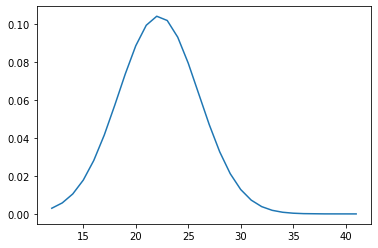

20 to 25


In [9]:
swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) & (olympics["Year"] <= 2016)]["Age"]
swimming_age = sorted(swimming_age)
mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)
probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)
plt.plot(swimming_age, probability_pdf)
plt.show()
print("20 to 25")

Q9. Is the overall distribution of Gold Medals tally of India, is it Reft or Right skewed?

In [10]:
olympics.rename(columns = {'region':'Country'}, inplace = True)
india_medals = olympics.loc[(olympics["Country"] == "India") & (olympics["Medal"] == "Gold")]
gold_count = india_medals.groupby("Year")["Medal"].value_counts()
if stats.skew(gold_count, bias=False) > 0:
    print("Right Skewed")
else:
    print("Left Skewed")

Left Skewed


Q10. What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)

In [11]:
import statistics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')
london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]
gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts()
london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]
gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts()
host_stdev = statistics.stdev(gold_count_host)
non_host_stdev = statistics.stdev(gold_count_non_host)
print(host_stdev)
print(non_host_stdev)

71.97453253292676
18.14528124684469


Q11. Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

In [12]:
shooting_age = olympics[olympics["Sport"] == "Shooting"]["Age"] 
original_mean = statistics.mean(shooting_age) 
original_sd = statistics.stdev(shooting_age)
standardized_data = [] 
for d in shooting_age:
    standardized_data.append((d - original_mean)/original_sd) 
standardized_mean = statistics.mean(standardized_data) 
standardized_sd = statistics.stdev(standardized_data) 
print(round(standardized_mean)) 
print(round(standardized_sd))

0
1


Q12. Is Age positively correlated or negatively correlated with winning the medal?

In [13]:
labels, categories = pd.factorize(olympics["Medal"])
olympics["medal_labels"] = labels
if olympics["Age"].corr(olympics["medal_labels"]) > 0:
    print("Positive")
else:
    print("Negative")

Positive


Q13. From the dataset, Calculate the IQR for the Age column.

In [14]:
age = olympics.Age
Q1 = np.percentile(age,25)
Q3 = np.percentile(age, 75)
iqr = Q3 - Q1
print(iqr)


6.0


Q14. In how many cities Olympics been held so far?
Also create a bar graph of the number of times cities hosted the Olympics.

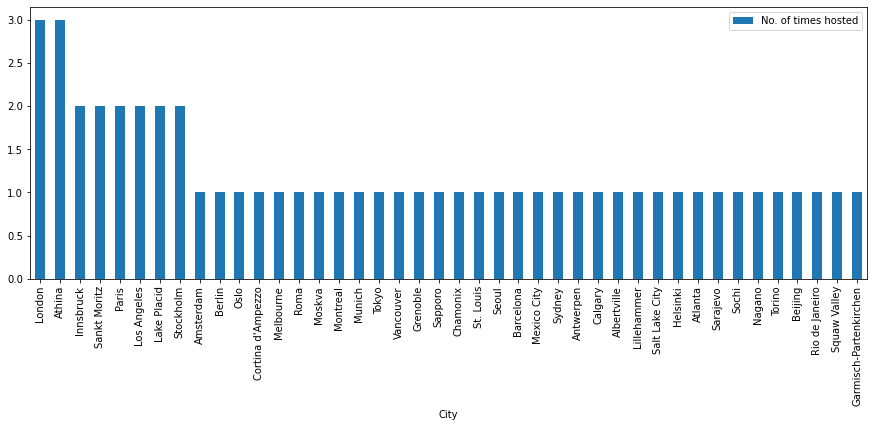

42


In [15]:
data = []
for city in olympics['City'].unique():
    host_count = 0
    for year in olympics['Year'].unique():
        if len(olympics[(olympics['City'] == city) & (olympics['Year'] == year)]) > 0:
            host_count += 1
    data.append([city, host_count])
plot_data = pd.DataFrame(data,columns = ['City','No. of times hosted']).sort_values(by='No. of times hosted', ascending = False)
plot_data.plot(x = 'City', y = 'No. of times hosted', kind = 'bar', figsize = (15,5))
plt.show()
Total_cities = len(olympics['City'].unique())
print(Total_cities)

Q15. Which sport is having the most number of medals so far?
First plot the bar chart to find out the top 5 sports that have the most number of medals and then print the sport having the highest medals.

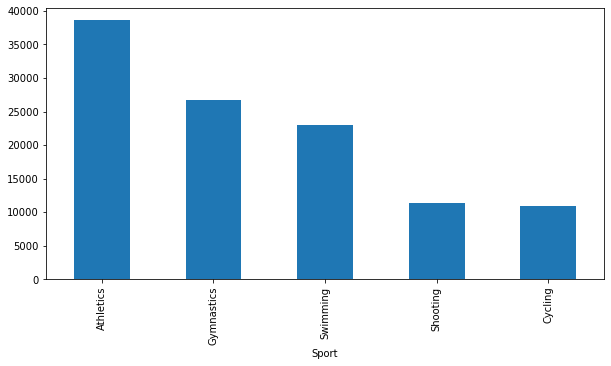

Athletics


In [16]:
olympics.groupby('Sport').count()['Medal'].sort_values(ascending =False).head().plot.bar(figsize=(10, 5))
plt.show()
print("Athletics")

Q16. Which Sport has the most number of Gold Medals so far?
First plot the bar chart to find out the top 5 sports that have the most number Gold of medals and then print the sport having the highest number of Gold medals.

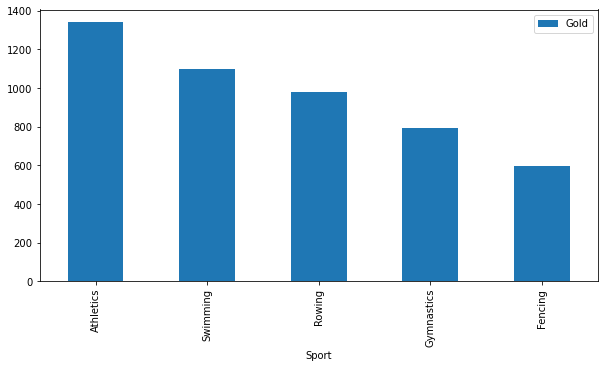

Athletics


In [17]:
gold = olympics[olympics['Medal'] == 'Gold']
data = []
for sport in gold['Sport'].unique():
    data.append([sport, len(gold[gold['Sport'] == sport])])
data = pd.DataFrame(data, columns = ['Sport', 'Gold']).sort_values(by='Gold', ascending =False).head()
data.plot(x='Sport', y='Gold', kind='bar', figsize=(10,5))
plt.show()
print("Athletics")

Q17 In which year did India win the first Gold Medal in the Olympics?

In [18]:
gold = olympics[olympics['Medal'] == 'Gold']
print(gold[gold['region'] == 'India']['Year'].min())

1924


Q18. Which event is most popular in terms of the number of players?
First plot the bar chart to find out the top 5 sports that have the most number of participants and then print the sport having the highest number of players participating.

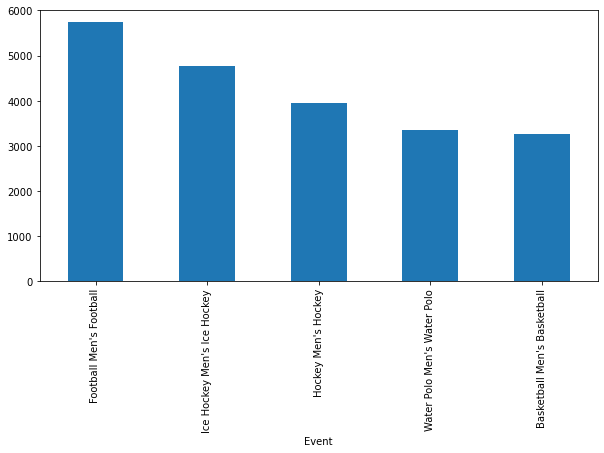

Football Men's Football


In [19]:
popular_event = olympics.groupby("Event").count()['Name'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()
print("Football Men's Football")

Q19. Which sport is having the most female Gold Medalists?
First plot the bar chart to find out the top 5 sports that have the most female Gold Medalists and then print the sport having the most female Gold Medalists.

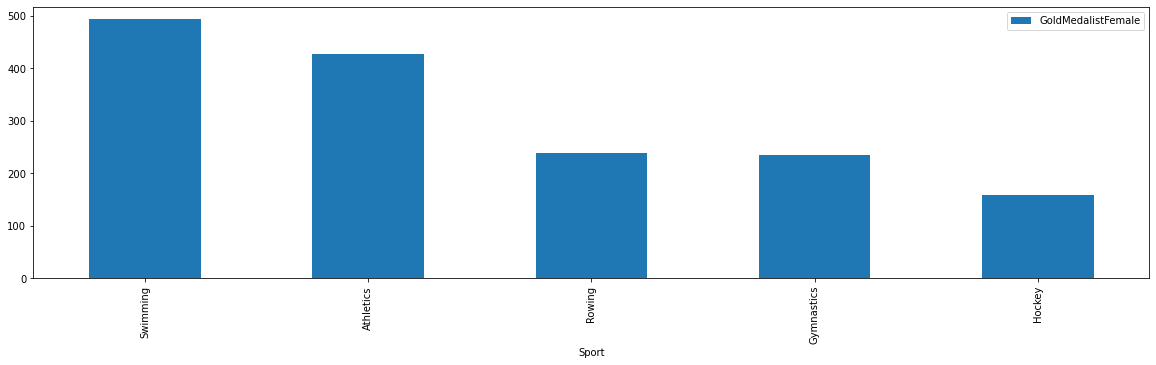

Swimming


In [20]:
gd= olympics[olympics.Medal =='Gold']
gdf = gd[gd.Sex =='F']
data=[]
for sports in gdf.Sport.unique():
    data.append([sports, len(gdf[gdf.Sport==sports])])
data= pd.DataFrame(data,columns=['Sport','GoldMedalistFemale']).sort_values(by='GoldMedalistFemale',ascending=False).head()
data.plot(x='Sport',y='GoldMedalistFemale', kind='bar', figsize=(20, 5))
plt.show()
print("Swimming")